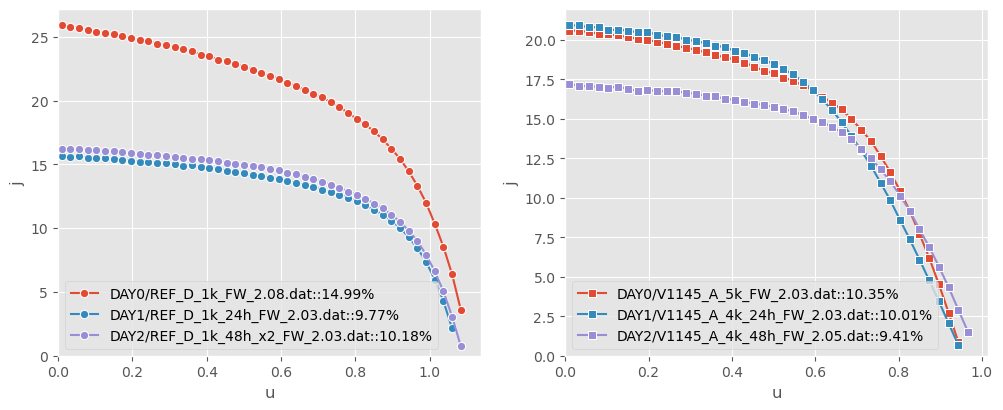

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import glob
plt.style.use(style='ggplot')

folders = sorted(glob.glob('DAY*'))
ref_files = sorted([glob.glob(i+'/REF*.dat') for i in folders])
v_files = sorted([glob.glob(i+'/V1145*.dat') for i in folders])

cls = ['u', 'i', 'j', 'p']

def get_df(l:list[str]) -> tuple[pd.DataFrame, str, float]:
    df = None
    mn = 0
    name = None
    for i in l:
        f = pd.read_csv(i, sep=';')
        m = f.iloc[:,3].min()
        if m <= mn:
            df, mn, name = f, m, i
    return df, name, abs(mn)

fig, axes = plt.subplots(1,2, figsize=[12,4.5])
for i in ref_files:
    d, n, pce = get_df(i)
    u, i, j, p = d.columns
    d[j] = d[j].values * (-1.0)
    d.columns = cls
    p = d.query(expr='u >= 0.0 and j >= 0.0')[['u', 'j']]
    sns.lineplot(data=p, x='u', y='j', ax=axes[0], label=f'{n}::{pce:0.2f}%', marker='o')

for i in v_files:
    d, n, pce = get_df(i)
    u, i, j, p = d.columns
    d[j] = d[j].values * (-1.0)
    d.columns = cls
    p = d.query(expr='u >= 0.0 and j >= 0.0')[['u', 'j']]
    sns.lineplot(data=p, x='u', y='j', ax=axes[1], label=f'{n}::{pce:0.2f}%', marker='s')

axes[0].set_xlim(0, axes[0].get_xlim()[-1])
axes[0].set_ylim(0, axes[0].get_ylim()[-1])
axes[1].set_xlim(0, axes[1].get_xlim()[-1])
axes[1].set_ylim(0, axes[1].get_ylim()[-1])
plt.show()

In [2]:
# Failo pavadinime yra specifinis kodas (D_5k, D_2k, B_1k, ir taip toliau). Pagal ansktesnį pavyzdį
#  matyti, jog taip paprastai atrenkant - tas trumpinys pakinta
#  pakeiskite skriptą taip, kad
#  jei jūsų skriptas rado, kad pavyzdžiui, DAY0 geriausias REF yra su kodu D_5k, tai
# DAY1 ir DAY2 turi būti vaizduojami duomenys iš failų su tuo pat kodu (D_5k pavyzdžiui)

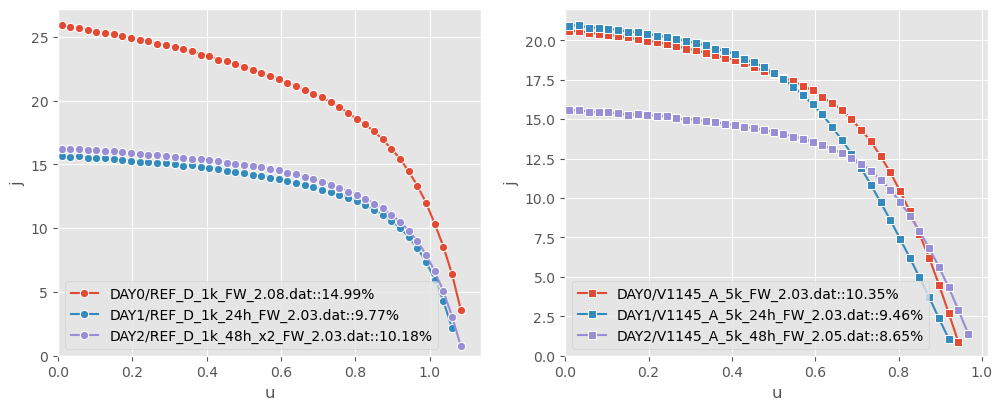

In [5]:
_, name_ref, __ = get_df(ref_files[0])
part_ref = '_'.join(name_ref.split('_')[:3])[5:]

_, name_v, __ = get_df(v_files[0])
part_v = '_'.join(name_v.split('_')[:3])[5:]

best_refs = sorted([glob.glob(i+f'/{part_ref}*.dat') for i in folders])
best_vs = sorted([glob.glob(i+f'/{part_v}*.dat') for i in folders])

fig, axes = plt.subplots(1,2, figsize=[12,4.5])
for i in best_refs:
    d, n, pce = get_df(i)
    u, i, j, p = d.columns
    d[j] = d[j].values * (-1.0)    
    d.columns = cls
    p = d.query(expr='u >= 0.0 and j >= 0.0')[['u', 'j']]
    sns.lineplot(data=p, x='u', y='j', ax=axes[0], label=f'{n}::{pce:0.2f}%', marker='o')

for i in best_vs:
    d, n, pce = get_df(i)
    u, i, j, p = d.columns
    d[j] = d[j].values * (-1.0)
    d.columns = cls
    p = d.query(expr='u >= 0.0 and j >= 0.0')[['u', 'j']]
    sns.lineplot(data=p, x='u', y='j', ax=axes[1], label=f'{n}::{pce:0.2f}%', marker='s')

axes[0].set_xlim(0, axes[0].get_xlim()[-1])
axes[0].set_ylim(0, axes[0].get_ylim()[-1])
axes[1].set_xlim(0, axes[1].get_xlim()[-1])
axes[1].set_ylim(0, axes[1].get_ylim()[-1])
plt.show()